<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1">Load data</a></span></li><li><span><a href="#Basic-Sankey-plot" data-toc-modified-id="Basic-Sankey-plot-2">Basic Sankey plot</a></span></li><li><span><a href="#Decorate-labels" data-toc-modified-id="Decorate-labels-3">Decorate labels</a></span><ul class="toc-item"><li><span><a href="#Highlight-labels" data-toc-modified-id="Highlight-labels-3.1">Highlight labels</a></span></li><li><span><a href="#Group-refreshing-drinks" data-toc-modified-id="Group-refreshing-drinks-3.2">Group refreshing drinks</a></span></li><li><span><a href="#Color-labels" data-toc-modified-id="Color-labels-3.3">Color labels</a></span></li></ul></li><li><span><a href="#Decorate-links" data-toc-modified-id="Decorate-links-4">Decorate links</a></span><ul class="toc-item"><li><span><a href="#Use-color-gradient" data-toc-modified-id="Use-color-gradient-4.1">Use color gradient</a></span></li><li><span><a href="#color-specific-links" data-toc-modified-id="color-specific-links-4.2">color specific links</a></span></li><li><span><a href="#highlight-links" data-toc-modified-id="highlight-links-4.3">highlight links</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from pysankey import sankey, __file__ as sankey_path

sankey_path = sankey_path.rsplit('/', 1)[0]

# Load data

In [2]:
df = pd.read_csv(
    sankey_path + '/customers-goods.csv', sep=',',
    names=['id', 'customer', 'good', 'revenue']
)

In [3]:
df

,id,customer,good,revenue
0,NaN,customer,good,revenue
1,0.0,John,fruit,5.5
2,1.0,Mike,meat,11.0
3,2.0,Betty,drinks,7.0
4,3.0,Ben,fruit,4.0
5,4.0,Betty,bread,2.0
6,5.0,John,bread,2.5
7,6.0,John,drinks,8.0
8,7.0,Ben,bread,2.0
9,8.0,Mike,bread,3.5


# Basic Sankey plot

In [4]:
weight = df['revenue'].values[1:].astype(float)

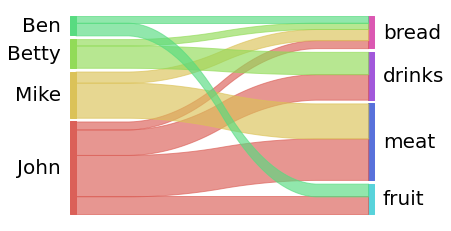

In [5]:
ax, left_coords, right_coords = sankey(
    left=df['customer'].values[1:], right=df['good'].values[1:],
    rightWeight=weight, leftWeight=weight, aspect=20, fontsize=20   
)

# Decorate labels

## Highlight labels

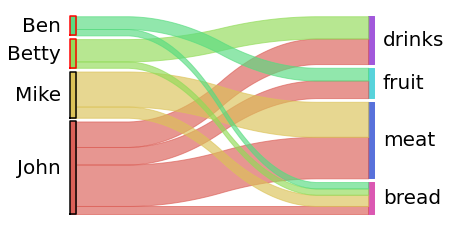

In [6]:
ax, left_coords, right_coords = sankey(
    left=df['customer'].values[1:], right=df['good'].values[1:],
    rightWeight=weight, leftWeight=weight, aspect=20, fontsize=20,
    rightLabels=['bread', 'meat', 'fruit', 'drinks'] 
)

# draw black line around rectangles on the left side
for k, (x1, x2, y1, y2) in left_coords.items():
    plt.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], 'r' if k[0] == 'B' else 'k')

## Group refreshing drinks

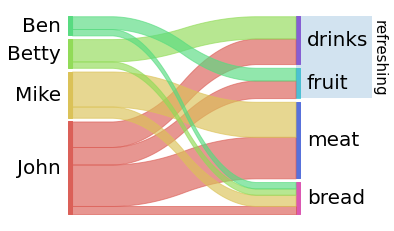

In [7]:
ax, left_coords, right_coords = sankey(
    left=df['customer'].values[1:], right=df['good'].values[1:],
    rightWeight=weight, leftWeight=weight, aspect=20, fontsize=20,
    rightLabels=['bread', 'meat', 'fruit', 'drinks'] 
)

# highlight a group of labels
group = ['fruit', 'drinks']
x1 = min(right_coords[k][0] for k in right_coords if k in group)
x2 = max(right_coords[k][1] for k in right_coords if k in group)
y1 = min(right_coords[k][2] for k in right_coords if k in group)
y2 = max(right_coords[k][3] for k in right_coords if k in group)

offset = 1 # this one is a bit manual
plt.fill_between([x1, x2 + offset], y1, y2, alpha=0.2)
_ = plt.text(x2 + offset * 1.1, (y1 + y2) / 2, 'refreshing', ha='center', va='center', 
             rotation=-90, size= 15)

## Color labels

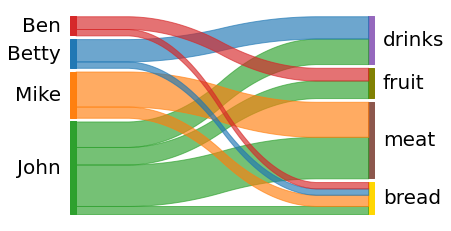

In [8]:
color_dict = {
    'Ben': 'tab:red',
    'Betty': 'tab:blue',
    'Mike': 'tab:orange',
    'John': 'tab:green',
    'drinks': 'tab:purple',
    'fruit': 'olive',
    'meat': 'tab:brown',
    'bread': 'gold',
}

ax, left_coords, right_coords = sankey(
    left=df['customer'].values[1:], right=df['good'].values[1:],
    rightWeight=weight, leftWeight=weight, aspect=20, fontsize=20,
    rightLabels=['bread', 'meat', 'fruit', 'drinks'], colorDict=color_dict
)

# Decorate links

## Use color gradient

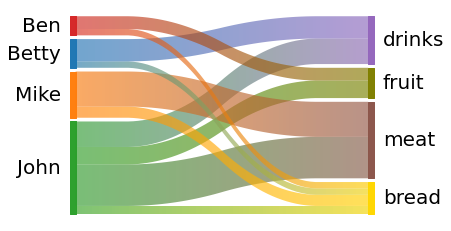

In [9]:
color_dict = {
    'Ben': 'tab:red',
    'Betty': 'tab:blue',
    'Mike': 'tab:orange',
    'John': 'tab:green',
    'drinks': 'tab:purple',
    'fruit': 'olive',
    'meat': 'tab:brown',
    'bread': 'gold',
}

ax, left_coords, right_coords = sankey(
    left=df['customer'].values[1:], right=df['good'].values[1:],
    rightWeight=weight, leftWeight=weight, aspect=20, fontsize=20, color_gradient=True,
    rightLabels=['bread', 'meat', 'fruit', 'drinks'], colorDict=color_dict
)

## color specific links

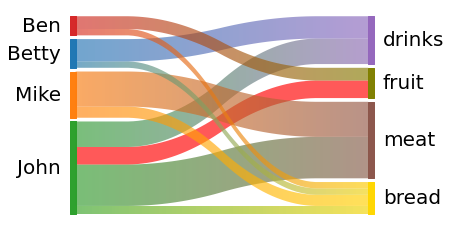

In [10]:
color_dict = {
    'Ben': 'tab:red',
    'Betty': 'tab:blue',
    'Mike': 'tab:orange',
    'John': 'tab:green',
    'drinks': 'tab:purple',
    'fruit': 'olive',
    'meat': 'tab:brown',
    'bread': 'gold',
    ('John', 'fruit'): 'red'
}

ax, left_coords, right_coords = sankey(
    left=df['customer'].values[1:], right=df['good'].values[1:],
    rightWeight=weight, leftWeight=weight, aspect=20, fontsize=20, color_gradient=True,
    rightLabels=['bread', 'meat', 'fruit', 'drinks'], colorDict=color_dict
)

## highlight links

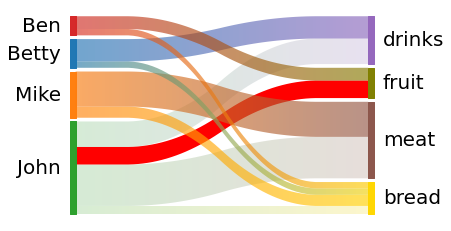

In [11]:
color_dict = {
    'Ben': 'tab:red',
    'Betty': 'tab:blue',
    'Mike': 'tab:orange',
    'John': 'tab:green',
    'drinks': 'tab:purple',
    'fruit': 'olive',
    'meat': 'tab:brown',
    'bread': 'gold',
    ('John', 'fruit'): 'red'
}

alpha_dict = {
    'Ben': 0.65,
    'Betty': 0.65,
    'Mike': 0.65,
    'John': 0.2,
    'drinks': 0.65,
    'fruit': 0.65,
    'meat': 0.65,
    'bread': 0.65,
    ('John', 'fruit'): 1
}

ax, left_coords, right_coords = sankey(
    left=df['customer'].values[1:], right=df['good'].values[1:],
    rightWeight=weight, leftWeight=weight, aspect=20, fontsize=20, color_gradient=True,
    rightLabels=['bread', 'meat', 'fruit', 'drinks'], colorDict=color_dict, alphaDict=alpha_dict
)